In [34]:
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import numpy as np


In [7]:
engine = create_engine('sqlite:///temperature.db')


In [8]:
data = pd.read_sql_table("timelog", engine)

In [11]:
data.tail()

,stamp,temp,hum,plug,heater
3939192,2021-02-06 20:45:20.594927,23.5,27.000000,0.0,1.0
3939193,2021-02-06 20:45:22.725671,23.5,27.000000,0.0,1.0
3939194,2021-02-06 20:45:25.170715,23.5,27.000000,0.0,1.0
3939195,2021-02-06 20:46:05.969470,NaN,NaN,0.0,1.0
3939196,2021-02-06 20:46:36.830061,23.5,26.799999,0.0,1.0


<AxesSubplot:>

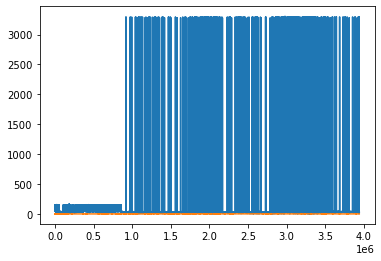

In [62]:
%matplotlib inline
data.hum.plot()


<AxesSubplot:>

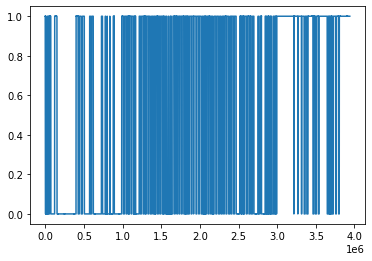

In [64]:
data.heater.plot()


In [20]:
type(data['stamp'][0])

str

In [30]:
type(data['temp'][0])

numpy.float64

In [22]:
data['stamp'] = pd.to_datetime(data['stamp'])

<AxesSubplot:xlabel='stamp'>

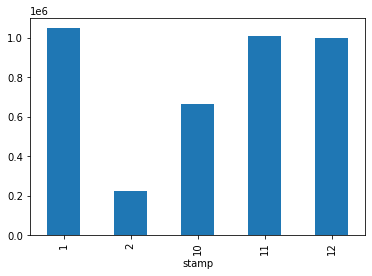

In [26]:
data.groupby(data['stamp'].dt.month).size().plot(kind = 'bar')

In [27]:
data.head()

,stamp,temp,hum,plug,heater
0,2020-10-14 15:22:31.111918,25.0,51.0,0.0,1.0
1,2020-10-14 15:22:32.914186,26.0,48.0,0.0,1.0
2,2020-10-14 15:22:37.486081,26.0,49.0,0.0,1.0
3,2020-10-14 15:22:39.234348,26.0,48.0,0.0,1.0
4,2020-10-14 15:22:41.081851,26.0,49.0,0.0,1.0


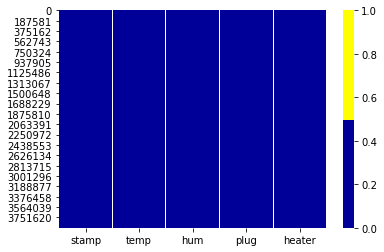

In [29]:
cols = data.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colors = ['#000099', '#ffff00'] 
a = sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colors))

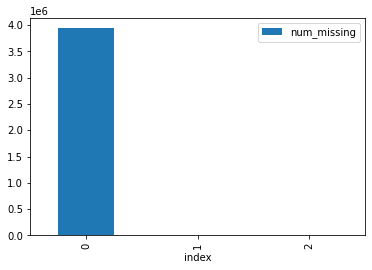

In [35]:
# сначала создаем индикатор для признаков с пропущенными данными
for col in data.columns:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
#         print('created missing indicator for: {}'.format(col))
        data['{}_ismissing'.format(col)] = missing
        
# затем на основе индикатора строим гистограмму
ismissing_cols = [col for col in data.columns if 'ismissing' in col]
data['num_missing'] = data[ismissing_cols].sum(axis=1)
u = data['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index')

In [50]:
data["temp"].isnull().mean()

5.077176896712706e-07

In [51]:
len(data)

3939197

In [53]:
data.head()

,stamp,temp,hum,plug,heater,temp_ismissing,hum_ismissing,plug_ismissing,heater_ismissing,num_missing
0,2020-10-14 15:22:31.111918,25.0,51.0,0.0,1.0,False,False,False,False,0
1,2020-10-14 15:22:32.914186,26.0,48.0,0.0,1.0,False,False,False,False,0
2,2020-10-14 15:22:37.486081,26.0,49.0,0.0,1.0,False,False,False,False,0
3,2020-10-14 15:22:39.234348,26.0,48.0,0.0,1.0,False,False,False,False,0
4,2020-10-14 15:22:41.081851,26.0,49.0,0.0,1.0,False,False,False,False,0


In [58]:
data.num_missing.mean()

0.0006765338214869681

<AxesSubplot:>

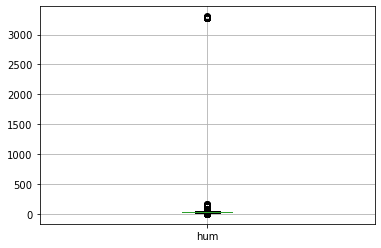

In [60]:
data.boxplot(column=['hum'])

In [61]:
data.hum.describe()

count    3.939195e+06
mean     3.491941e+01
std      5.994186e+01
min      0.000000e+00
25%      3.000000e+01
50%      3.270000e+01
75%      3.600000e+01
max      3.305700e+03
Name: hum, dtype: float64